In [4]:
import pandas as pd

data_df = pd.read_csv("c3_marketing-outliers.csv")
data_df.shape

(55, 4)

In [5]:
data_df.tail()

,tv,web,radio,sales
50,2.293,2.314,1.167,8.937
51,2.891,1.895,1.365,8.132
52,1.305,1.940,1.454,8.892
53,11.022,1.855,1.282,1.389
54,11.786,2.066,1.466,1.623


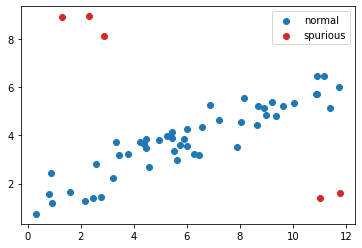

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract tv and sales
x = data_df.tv.values
y = data_df.sales.values

# Plot the data points
plt.scatter(x[:-5], y[:-5], label="normal")
plt.scatter(x[-5:], y[-5:], c="C3", label="spurious")
plt.legend()
plt.show()

In [12]:
# test to see impact of added outliers

import numpy as np

# fit linear regression
coefs = np.polyfit(x, y, deg=1)
print("coefs:", coefs)

coefs: [0.20613307 2.76540858]


In [13]:
# fit without outliers

coefs_wo = np.polyfit(x[:-5], y[:-5], deg=1)
print("coefs without outliers:", coefs_wo)

coefs without outliers: [0.42063597 1.27867727]


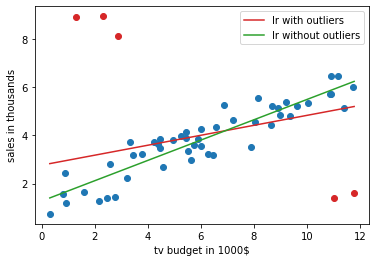

In [14]:
# Compute prediction line
x_values = np.linspace(min(x), max(x), num=100)
y_values = np.polyval(coefs, x_values)
y_values_wo = np.polyval(coefs_wo, x_values)

# Plot them
plt.scatter(x[:-5], y[:-5])
plt.scatter(x[-5:], y[-5:], c="C3")
plt.plot(x_values, y_values, c="C3", label="lr with outliers")
plt.plot(x_values, y_values_wo, c="C2", label="lr without outliers")
plt.xlabel("tv budget in 1000$")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()

the red line doesn’t fit well the trend in the data points in blue. This is because the polyfit() function minimizes the RSS measure which puts too much weight on large errors. In fact, by squaring the residuals, it amplifies the error for points  far away from the predictions

In [16]:
# prove issue with RSS scores

# compute predictions for all data points
y_pred = np.polyval(coefs, x)

# compute squares of residuals
squares_residuals = np.square(y - y_pred)

print("RSS normal points:", np.sum(squares_residuals[:-5]))
print("RSS outliers:", np.sum(squares_residuals[-5:])) 

RSS normal points: 39.533764623373465
RSS outliers: 115.6176164792112


In [17]:
# select outliers based on visual 

idx = ((x < 4) & (y > 6)) | ((x > 10) & (y < 2))

In [19]:
# can also be written in np logical format

np.logical_or(np.logical_and(x < 4, y > 6),
              np.logical_and(x > 10, y <2 ))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True])

In [21]:
# extract normal points
x1, y1 = x[~idx], y[~idx]
print("x1/y1:", x1.shape, y1.shape)

# extract outliers
x2, y2 = x[idx], y[idx]
print("x2/y2:", x2.shape, y2.shape)

x1/y1: (50,) (50,)
x2/y2: (5,) (5,)


In [22]:
# compute z score for y values
z_scores = (y - y.mean()) / y.std()

print("z-scores:", z_scores.shape)

z-scores: (55,)


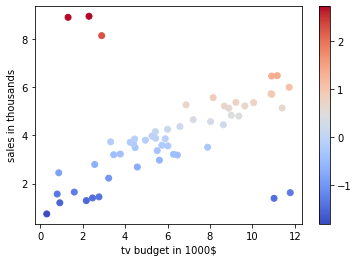

In [23]:
# Plot z-scores
plt.scatter(x, y, c=z_scores, cmap="coolwarm")
plt.xlabel("tv budget in 1000$")
plt.ylabel("sales in thousands")
plt.colorbar()
plt.show()

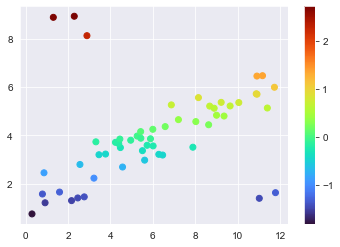

In [24]:
import seaborn as sns

# Activate Seaborn style
sns.set_style("darkgrid")

# Plot z-scores
plt.scatter(x, y, c=z_scores, cmap="turbo")
plt.colorbar()
plt.show()

In [25]:
# select outliers now using z score > 2 ie 3 data points in top left of graph
idx = np.abs(z_scores) > 2
idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False])

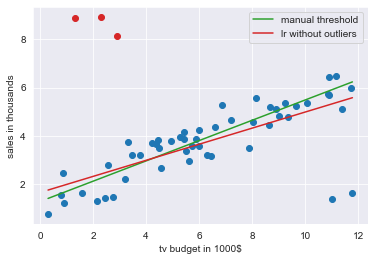

In [27]:
# plot without z score outliers removed

# Fit linear regression
coefs_z = np.polyfit(x[~idx], y[~idx], deg=1)

# Prediction line
y_values_zscore = np.polyval(coefs_z, x_values)

# Final comparison
plt.scatter(x[~idx], y[~idx])
plt.scatter(x[idx], y[idx], c="C3")
plt.plot(x_values, y_values_wo, c="C2", label="manual threshold")
plt.plot(x_values, y_values_zscore, c="C3", label="lr without outliers")
plt.xlabel("tv budget in 1000$")
plt.ylabel("sales in thousands")
plt.legend()
plt.show()